# <center> What makes a song a hit? 
    
### <center> Data Science in Practice
   Authors:
    
  

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json

## Introduction
This is the jupyter notebook containing code used to complete the Data Science in Practice project. 

## Collecting Data

The data used in this project wasn't readily available or pre-made. Effort was placed in finding a data source and compiling the information to generate 2 sets of data used in this project. 
1. Spotify Charts website was used to download csv files containing top 200 weekly rankings. The weekly ranking for each week in 2018 and 2019 were downloaded separately.
2. Each file was renamed by adding a number from 1 to 52 in chronological order at the end of the file name to allow for easy looping in python when needing to concatenate the data
3. 

The formatting of the csv file wasn't pandas friendly and so the following commands needed to be used to remove the non-relevant first row and replace the second rows of values as columns

In [2]:
df= pd.read_csv('regional-us-weekly-2018-1.csv')
df.columns = df.iloc[0]
df=df.drop(df.index[0])
df.index = np.arange(len(df))
df.head()

,Position,Track Name,Artist,Streams,URL
0,1,rockstar,Post Malone,9855305,https://open.spotify.com/track/7wGoVu4Dady5GV0...
1,2,Finesse - Remix; feat. Cardi B,Bruno Mars,8504248,https://open.spotify.com/track/3Vo4wInECJQuz9B...
2,3,No Limit,G-Eazy,7685058,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...
3,4,Bartier Cardi (feat. 21 Savage),Cardi B,7439471,https://open.spotify.com/track/75FDPwaULRdYDn4...
4,5,I Fall Apart,Post Malone,6971450,https://open.spotify.com/track/75ZvA4QfFiZvzhj...


The original downloaded csv's only contined information regarding Position,Track Name,Artist,Streams and URL. In addition to combining all the weeks into a single data frame it was thus also necessary to collect feature vales using spotify's web API and a get command. 

In order to collect information the song id was needed, the url of the song was used and sliced to extract this information

In [4]:
urlsong=df.loc[0, 'URL']
idsong=urlsong.partition('track/')[2]
getlink="https://api.spotify.com/v1/audio-features/" + idsong
print(getlink)

https://api.spotify.com/v1/audio-features/7wGoVu4Dady5GV0Sv4UIsx


This procedure was done for one song in order to get the name of the future column values calling for dictionary keys. This would allow the data frame to later be populated

In [5]:
client_id =  "e6c389f493e54752b303493e4955233f"
client_secret = "2364d7ce0600422eb3d479c61a0d018c"
grant_type = 'client_credentials'
body_params = {'grant_type' : grant_type}
url='https://accounts.spotify.com/api/token'
response=requests.post(url, data=body_params, auth = (client_id, client_secret)) 
token_raw = json.loads(response.text)
token = token_raw["access_token"]
headers = {"Authorization": "Bearer {}".format(token)}
response = requests.get(getlink, headers=headers)

newdict=response.json()
#getting values for columns/features
a=list(newdict.keys())
#b stores values that will be needed to fill rows of given song
b=list(newdict.values())
#initialize with empty columns
for i in a:
    df[i]=""
df.head()

,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,1,rockstar,Post Malone,9855305,https://open.spotify.com/track/7wGoVu4Dady5GV0...,,,,,,...,,,,,,,,,,
1,2,Finesse - Remix; feat. Cardi B,Bruno Mars,8504248,https://open.spotify.com/track/3Vo4wInECJQuz9B...,,,,,,...,,,,,,,,,,
2,3,No Limit,G-Eazy,7685058,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...,,,,,,...,,,,,,,,,,
3,4,Bartier Cardi (feat. 21 Savage),Cardi B,7439471,https://open.spotify.com/track/75FDPwaULRdYDn4...,,,,,,...,,,,,,,,,,
4,5,I Fall Apart,Post Malone,6971450,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,,,,,,...,,,,,,,,,,


Creating 2018 data set example is seen below, a similar code was used to generate 2019 data set

for j in range(0,53):
    df= pd.read_csv('regional-us-weekly-2018-%d.csv' %(j))
    df.columns = df.iloc[0]
    df=df.drop(df.index[0])
    df.index = np.arange(len(df))
    
    client_id =  "e6c389f493e54752b303493e4955233f"
    client_secret = "2364d7ce0600422eb3d479c61a0d018c"
    grant_type = 'client_credentials'
    body_params = {'grant_type' : grant_type}
    url='https://accounts.spotify.com/api/token'
    response=requests.post(url, data=body_params, auth = (client_id, client_secret)) 
    token_raw = json.loads(response.text)
    token = token_raw["access_token"]
    headers = {"Authorization": "Bearer {}".format(token)}
    urlsong=df.loc[0, 'URL']
    idsong=urlsong.partition('track/')[2]
    getlink="https://api.spotify.com/v1/audio-features/" + idsong

    response = requests.get(getlink, headers=headers)
    newdict=response.json()
    a=list(newdict.keys())
    b=list(newdict.values())
    for i in a:
        df[i]=""
    
    df['week']=''
    df['year']=''
    if j ==1:
        dftotal=pd.DataFrame(columns=df.columns)

    

    for r in df.index.values:
        urlsong=df.loc[r, 'URL']
        idsong=urlsong.partition('track/')[2]
        getlink="https://api.spotify.com/v1/audio-features/" + idsong
        response=requests.post(url, data=body_params, auth = (client_id, client_secret)) 
        token_raw = json.loads(response.text)
        token = token_raw["access_token"]
        headers = {"Authorization": "Bearer {}".format(token)}
        response = requests.get(getlink, headers=headers)


        newdict=response.json()
        a=list(newdict.keys())
        b=list(newdict.values())
        df.loc[r, a]=b
        df.loc[r,'week']=j
        df.loc[r,'year']=2018
        
    dftotal=pd.concat([dftotal, df], ignore_index=True)
    
#saving the finished concatenated 2018 csv file with all 52 weeks
dftotal.to_csv ('2018weekconcat.csv', index = False, header=True)

## Exploratory Data Analysis

Check that there are no null values in dataframe

In [10]:
dfall.isnull().sum().sum()


0

### Initial Overview
Before looking for trends and patterns in time and amongst different categories we will first explore what the data looks like

In [2]:
#Importing the finished datasets
df18= pd.read_csv('2018weekconcat.csv')
df19= pd.read_csv('2019weekconcat.csv')
dfall=pd.concat([df18, df19], ignore_index=True)


In [3]:
dfall.dtypes

Position              int64
Track Name           object
Artist               object
Streams               int64
URL                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
week                  int64
year                  int64
dtype: object

Text(0.5, 1.0, 'duration [ms] 2019')

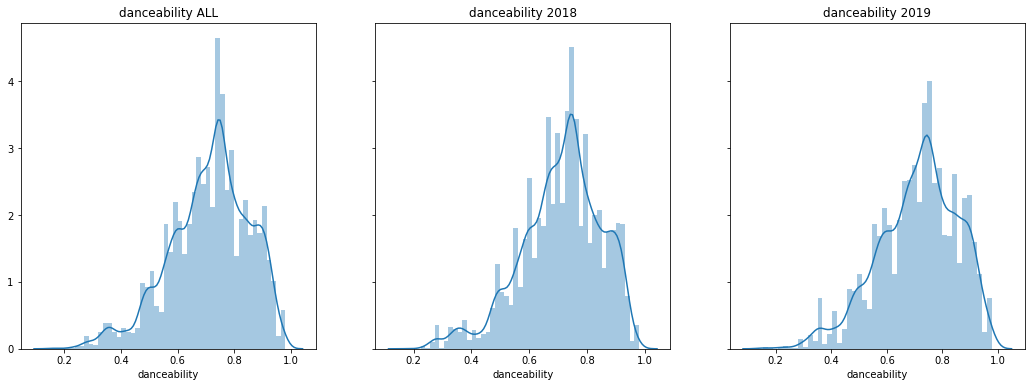

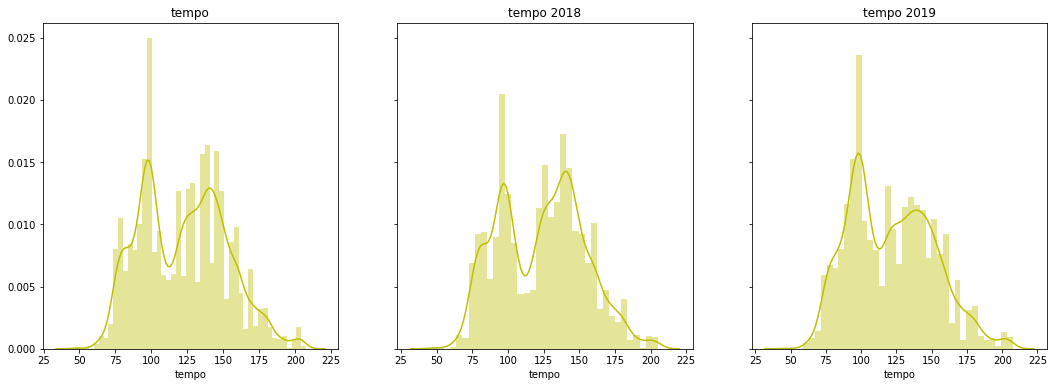

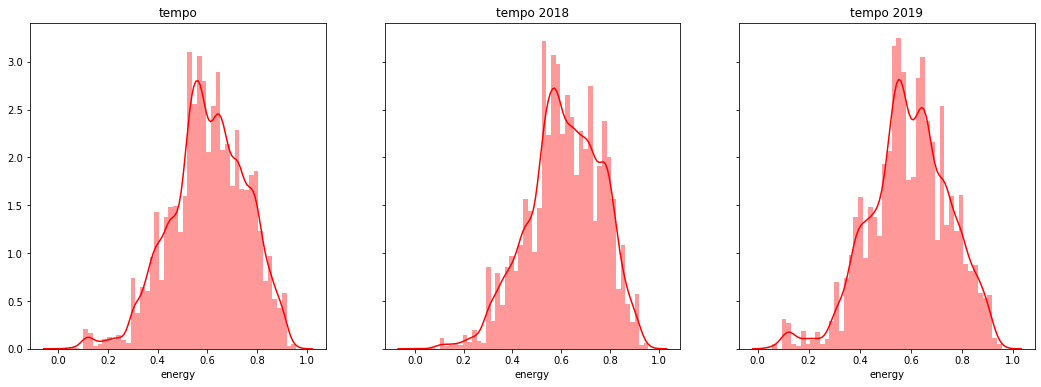

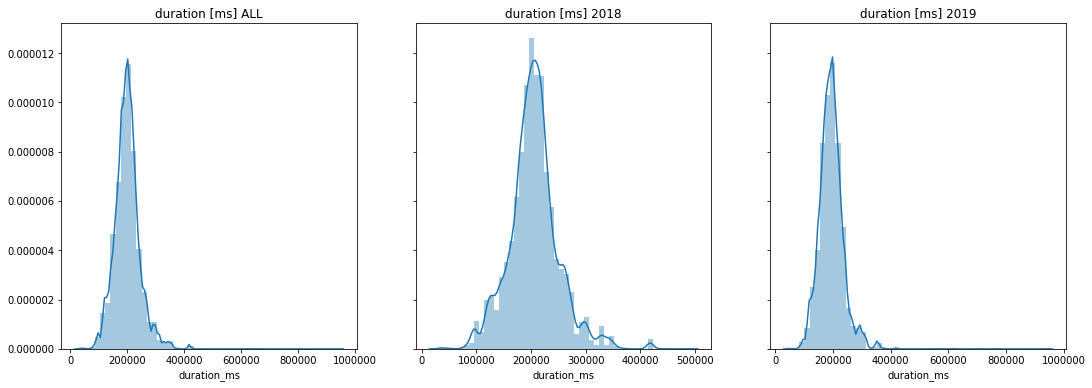

In [9]:
f1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(18, 6))                                  

plt.sca(ax1)
sns.distplot(dfall['danceability'])
plt.title('danceability ALL')
plt.sca(ax2)
sns.distplot(df18['danceability'])
plt.title('danceability 2018')
plt.sca(ax3)
sns.distplot(df19['danceability'])
plt.title('danceability 2019')

f1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(18, 6))                                  

plt.sca(ax1)
sns.distplot(dfall['tempo'],color="y")
plt.title('tempo')
plt.sca(ax2)
sns.distplot(df18['tempo'],color="y")
plt.title('tempo 2018')
plt.sca(ax3)
sns.distplot(df19['tempo'],color="y")
plt.title('tempo 2019')

f1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(18, 6))                                  

plt.sca(ax1)
sns.distplot(dfall['energy'],color="r")
plt.title('tempo')
plt.sca(ax2)
sns.distplot(df18['energy'],color="r")
plt.title('tempo 2018')
plt.sca(ax3)
sns.distplot(df19['energy'],color="r")
plt.title('tempo 2019')


f1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(18, 6))                                  

plt.sca(ax1)
sns.distplot(dfall['duration_ms'])
plt.title('duration [ms] ALL')
plt.sca(ax2)
sns.distplot(df18['duration_ms'])
plt.title('duration [ms] 2018')
plt.sca(ax3)
sns.distplot(df19['duration_ms'])
plt.title('duration [ms] 2019')


Now what if we do the same analysis but differentiate between top 20% (40 or above) song and average hit songs

In [3]:

df18['top'] = np.where(df18['Position']<21, 1, 0)
df19['top'] = np.where(df19['Position']<21, 1, 0)
dfall['top'] = np.where(dfall['Position']<21, 1, 0)


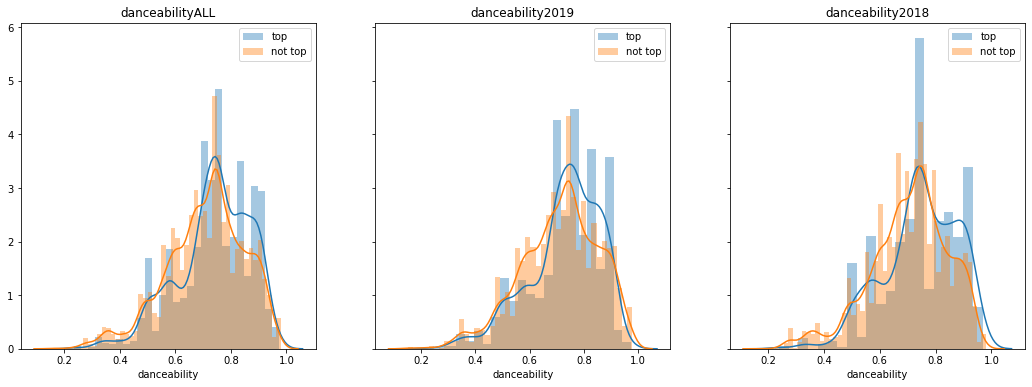

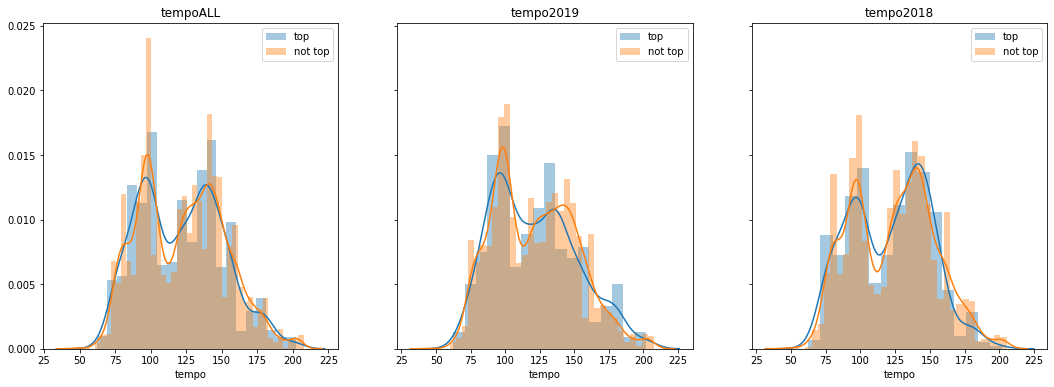

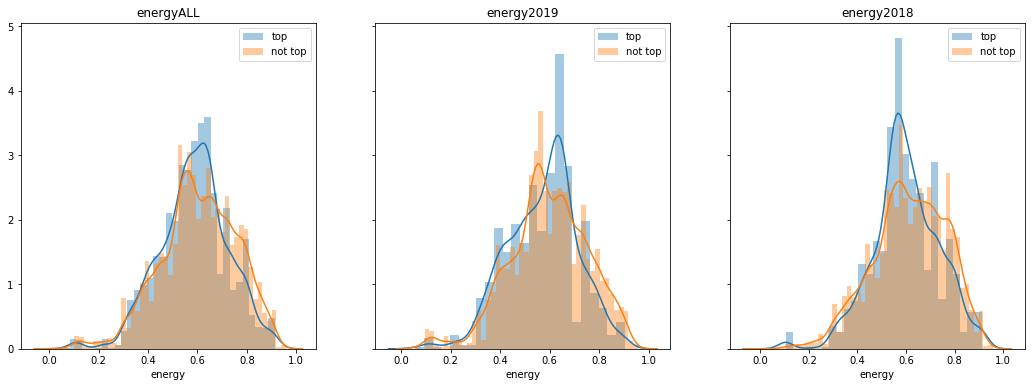

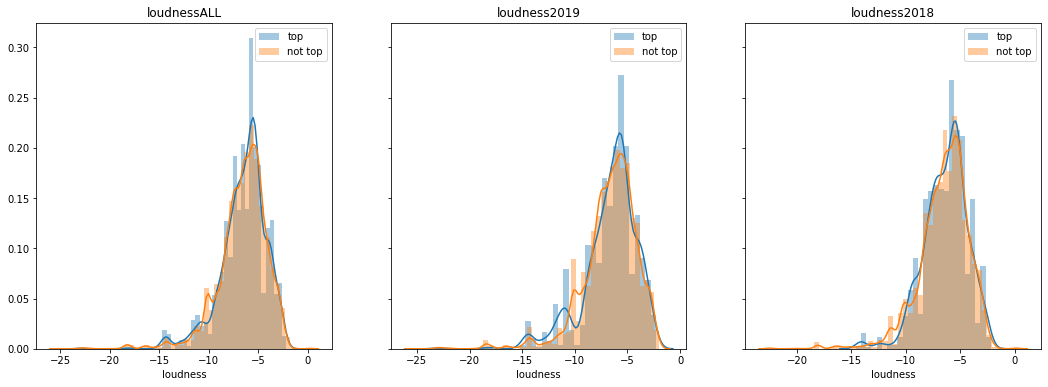

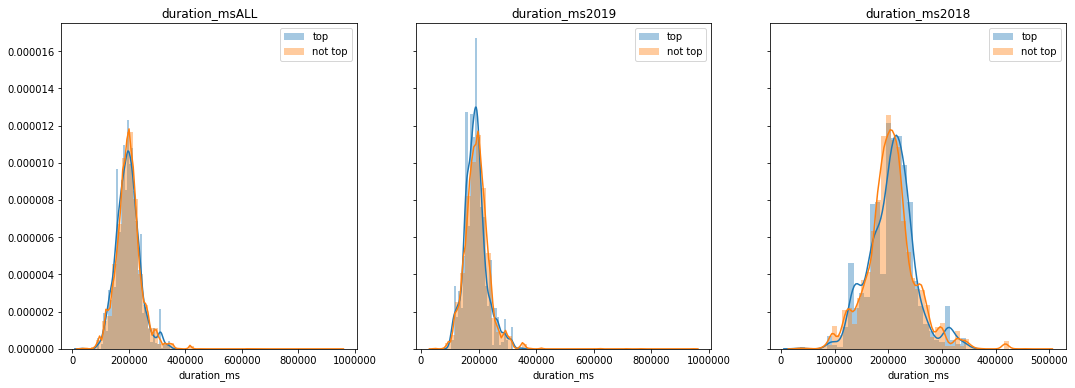

In [19]:
features=['danceability','tempo','energy','loudness','duration_ms']

for feat in features:
    f1, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(18, 6))                                  

    plt.sca(ax1)
    df = dfall[dfall.top == 1]
    sns.distplot(df[feat], label='top')
    plt.title(feat + 'ALL')
    df = dfall[dfall.top == 0]
    sns.distplot(df[feat],label='not top')
    plt.legend()

    plt.sca(ax2)
    df = df19[df19.top == 1]
    sns.distplot(df[feat], label='top')
    plt.title(feat+'2019')
    df = df19[df19.top == 0]
    sns.distplot(df[feat],label='not top')
    plt.legend()

    plt.sca(ax3)
    df = df18[df18.top == 1]
    sns.distplot(df[feat], label='top')
    plt.title(feat +'2018')
    df = df18[df18.top == 0]
    sns.distplot(df[feat],label='not top')
    plt.legend()


## Exploring possible time patterns

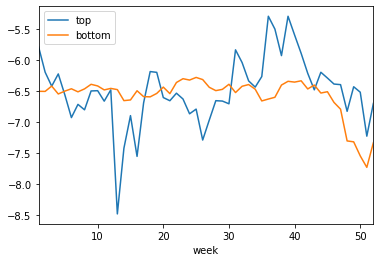

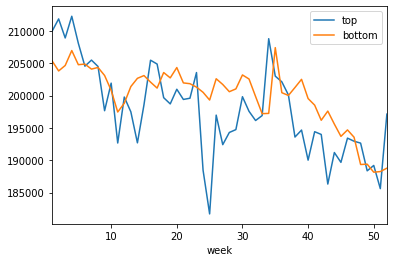

In [12]:

dfall_top=dfall[dfall['Position']<21]
dfall_bot=dfall[dfall['Position']>=21]

ax=dfall_top.groupby('week')['loudness'].mean().plot(kind='line')
ax=dfall_bot.groupby('week')['loudness'].mean().plot(kind='line')
ax.legend(["top", "bottom"])

plt.figure()
ax2=dfall_top.groupby('week')['duration_ms'].mean().plot(kind='line')
ax2=dfall_bot.groupby('week')['duration_ms'].mean().plot(kind='line')
ax2.legend(["top", "bottom"])

## Modelling 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix,average_precision_score

### Random forest

using all data dfall without oversamplig

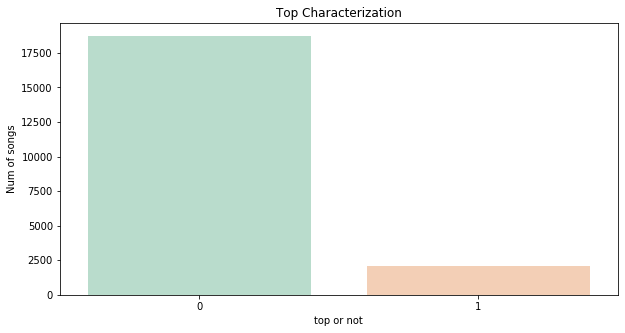

In [6]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=dfall, x='top',palette="Pastel2")
ax.set(xlabel='top or not', ylabel='Num of songs')
plt.title("Top Characterization")
plt.show()

Accuracy Score: 0.9139423076923077
Recall Score: 0.2932692307692308
Precision Score: 0.6559139784946236


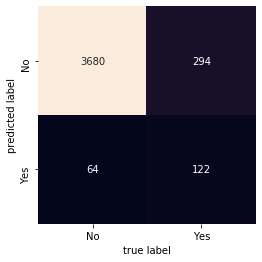

In [35]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']            
X=dfall[features]
y=dfall['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

Random forest with oversampling

df1count  1664
df0count  14976
df1_over  14976
Accuracy Score: 0.7778846153846154
Recall Score: 0.7740384615384616
Precision Score: 0.2795138888888889


(2.0, 0.0)

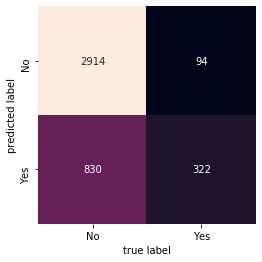

In [36]:
X_train, X_test, y_train, y_test = train_test_split(dfall, dfall["top"], stratify=dfall["top"],test_size=0.2)
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']               
# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry random forest classifier
clf = RandomForestClassifier()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

### SVM
using dfall without oversampling

Accuracy Score: 0.9028846153846154
Recall Score: 0.04326923076923077
Precision Score: 0.75


(2.0, 0.0)

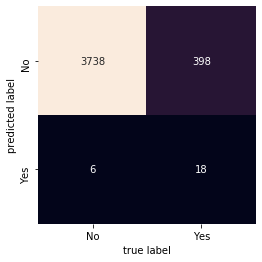

In [37]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']            
X=dfall[features]
scaler =StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=dfall['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

clf = svm.SVC()
clf.fit(X_train, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

svm with oversampling

df1count  1664
df0count  14976
df1_over  14976
Accuracy Score: 0.7216346153846154
Recall Score: 0.7548076923076923
Precision Score: 0.2291970802919708


(2.0, 0.0)

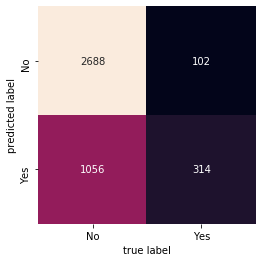

In [38]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']        
df_scaled = dfall.copy()
scaler =StandardScaler()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_scaled["top"], stratify=df_scaled["top"],test_size=0.2)
            
# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]


#retry svm
clf = svm.SVC()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

### Logistic Regression

without oversampling 

Accuracy Score: 0.9
Recall Score: 0.0
Precision Score: 0.0


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(2.0, 0.0)

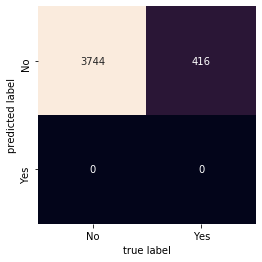

In [52]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']            
X=dfall[features]
y=dfall['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)
logReg = LogisticRegression(max_iter=10000)
logReg.fit(X_train, y_train)
y_pred=predictions = logReg.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

with oversampling

df1count  1664
df0count  14976
df1_over  14976
Accuracy Score: 0.5971153846153846
Recall Score: 0.5841346153846154
Precision Score: 0.13917525773195877


(2.0, 0.0)

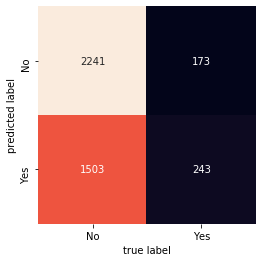

In [47]:
X_train, X_test, y_train, y_test = train_test_split(dfall, dfall["top"], stratify=dfall["top"],test_size=0.2)
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']            
# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry logistic
logReg = LogisticRegression(max_iter=10000)
logReg.fit(X_trainb, y_train)
y_pred=predictions = logReg.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

## KPI 2
Looking at songs as individuals: distinct songs, ranked a hit if reached top at least once in 2018 or 2019

In [39]:
#number of distinct track name in 2019 200 weekly charts
dfall['Track Name'].unique().size

2177

In [40]:
dfalltop=dfall[dfall['top']==1]
dfalltop['Track Name'].unique().size

430

Sort in ascending the postion, so ony keep lower (so best on top 200) of each unique song and drop duplicates

In [41]:
dfallnondup=dfall.sort_values('Position', ascending=True).drop_duplicates('Track Name')
dfallnondup.index = np.arange(len(dfallnondup))
dfallnondup.head()

,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,week,year,top
0,1,rockstar,Post Malone,9855305,https://open.spotify.com/track/7wGoVu4Dady5GV0...,0.577,0.522,5,-6.594,0,...,audio_features,7wGoVu4Dady5GV0Sv4UIsx,spotify:track:7wGoVu4Dady5GV0Sv4UIsx,https://api.spotify.com/v1/tracks/7wGoVu4Dady5...,https://api.spotify.com/v1/audio-analysis/7wGo...,218320,4,1,2018,1
1,1,Nice For What,Drake,19830250,https://open.spotify.com/track/1cTZMwcBJT0Ka3U...,0.567,0.913,8,-6.471,1,...,audio_features,1cTZMwcBJT0Ka3UJPXOeeN,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,https://api.spotify.com/v1/tracks/1cTZMwcBJT0K...,https://api.spotify.com/v1/audio-analysis/1cTZ...,210926,4,15,2018,1
2,1,Circles,Post Malone,12719540,https://open.spotify.com/track/21jGcNKet2qwijl...,0.695,0.762,0,-3.497,1,...,audio_features,21jGcNKet2qwijlDFuPiPb,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4,37,2019,1
3,1,Better Now,Post Malone,21229827,https://open.spotify.com/track/7dt6x5M1jzdTEt8...,0.680,0.578,10,-5.804,1,...,audio_features,7dt6x5M1jzdTEt8oCbisTK,spotify:track:7dt6x5M1jzdTEt8oCbisTK,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,https://api.spotify.com/v1/audio-analysis/7dt6...,231267,4,17,2018,1
4,1,Lover,Taylor Swift,12784772,https://open.spotify.com/track/1dGr1c8CrMLDpV6...,0.359,0.543,7,-7.582,1,...,audio_features,1dGr1c8CrMLDpV6mPbImSI,spotify:track:1dGr1c8CrMLDpV6mPbImSI,https://api.spotify.com/v1/tracks/1dGr1c8CrMLD...,https://api.spotify.com/v1/audio-analysis/1dGr...,221307,4,34,2019,1


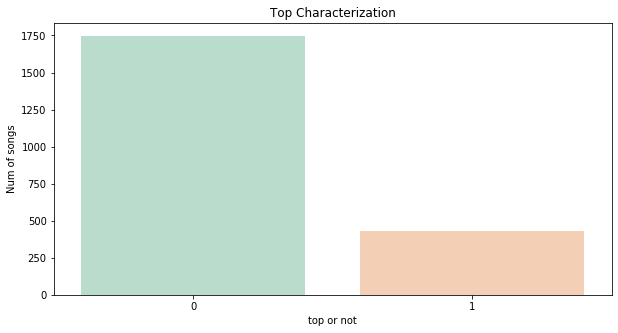

In [43]:
## visualizing distribution of top and not top unique songs
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=dfallnondup, x='top',palette="Pastel2")
ax.set(xlabel='top or not', ylabel='Num of songs')
plt.title("Top Characterization")
plt.show()

### Decision tree
without oversampling

Accuracy Score: 0.8165137614678899
Recall Score: 0.06976744186046512
Precision Score: 1.0


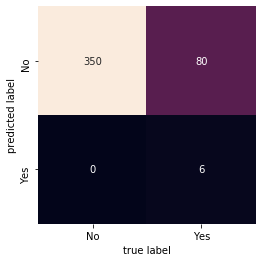

In [44]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']            
X=dfallnondup[features]
y=dfallnondup['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

decision tree with oversampling

df1count  344
df0count  1397
df1_over  1397
Accuracy Score: 0.7958715596330275
Recall Score: 0.03488372093023256
Precision Score: 0.3333333333333333


(2.0, 0.0)

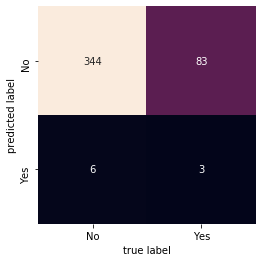

In [48]:
X_train, X_test, y_train, y_test = train_test_split(dfallnondup, dfallnondup["top"], stratify=dfallnondup["top"],test_size=0.2)
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']               
# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry random forest classifier
clf = RandomForestClassifier()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

### SVM
without oversampling

Accuracy Score: 0.8027522935779816
Recall Score: 0.0
Precision Score: 0.0


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(2.0, 0.0)

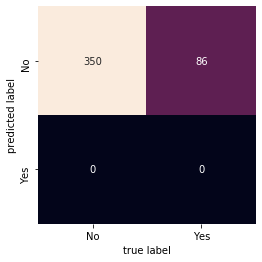

In [49]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']            
X=dfallnondup[features]
scaler =StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=dfallnondup['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

clf = svm.SVC()
clf.fit(X_train, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

with oversampling

df1count  344
df0count  1397
df1_over  1397
Accuracy Score: 0.6100917431192661
Recall Score: 0.38372093023255816
Precision Score: 0.22


(2.0, 0.0)

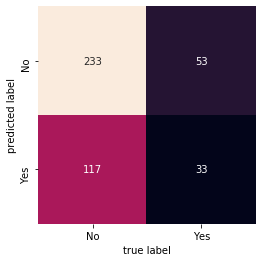

In [50]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','duration_ms']        
df_scaled = dfallnondup.copy()
scaler =StandardScaler()
df_scaled[features] = scaler.fit_transform(df_scaled[features])

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_scaled["top"], stratify=df_scaled["top"],test_size=0.2)
            
# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]


#retry svm
clf = svm.SVC()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

### Logistic regression
without oversampling

Accuracy Score: 0.8027522935779816
Recall Score: 0.0
Precision Score: 0.0


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(2.0, 0.0)

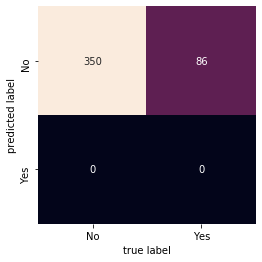

In [53]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']            
X=dfallnondup[features]
y=dfallnondup['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)
logReg = LogisticRegression(max_iter=10000)
logReg.fit(X_train, y_train)
y_pred=predictions = logReg.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

with oversampling

df1count  344
df0count  1397
df1_over  1397
Accuracy Score: 0.5298165137614679
Recall Score: 0.43023255813953487
Precision Score: 0.19170984455958548


(2.0, 0.0)

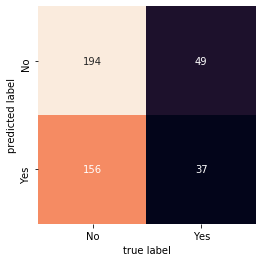

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dfallnondup, dfallnondup["top"], stratify=dfallnondup["top"],test_size=0.2)
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']            
# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry logistic
logReg = LogisticRegression(max_iter=10000)
logReg.fit(X_trainb, y_train)
y_pred=predictions = logReg.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

### Old test code 

#### for dfall

df1count  1560
df0count  14040
df1_over  14040
Accuracy Score: 0.5198076923076923
Recall Score: 0.4980769230769231
Precision Score: 0.10380761523046092


(2.0, 0.0)

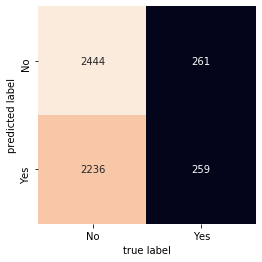

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dfall, dfall["top"], stratify=dfall["top"])
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']            

# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry svc
clf = svm.SVC()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry svc
clf = svm.SVC()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

## New section

In [13]:
#number of distinct track name in 2019 200 weekly charts
df19['Track Name'].unique().size

1192

Change data set and consider year as a whole, top meaning song reached top at some point

In [15]:
df19top=df19[df19['top']==1]
df19top['Track Name'].unique().size

219

drop non feature column and then add "top" if at some point during the year the song was popular

In [18]:
df19.head()

,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,week,year,top
0,1,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,14202522,https://open.spotify.com/track/3KkXRkHbMCARz0a...,0.760,0.479,2,-5.574,1,...,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,1,2019,1
1,2,Wow.,Post Malone,12721360,https://open.spotify.com/track/6MWtB6iiXyIwun0...,0.833,0.539,11,-7.399,0,...,audio_features,6MWtB6iiXyIwun0YzU6DFP,spotify:track:6MWtB6iiXyIwun0YzU6DFP,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,https://api.spotify.com/v1/audio-analysis/6MWt...,149520,4,1,2019,1
2,3,Going Bad (feat. Drake),Meek Mill,9576466,https://open.spotify.com/track/2IRZnDFmlqMuOrY...,0.889,0.496,4,-6.365,0,...,audio_features,2IRZnDFmlqMuOrYOLnZZyc,spotify:track:2IRZnDFmlqMuOrYOLnZZyc,https://api.spotify.com/v1/tracks/2IRZnDFmlqMu...,https://api.spotify.com/v1/audio-analysis/2IRZ...,180522,4,1,2019,1
3,4,SICKO MODE,Travis Scott,9005380,https://open.spotify.com/track/2xLMifQCjDGFmkH...,0.834,0.730,8,-3.714,1,...,audio_features,2xLMifQCjDGFmkHkpNLD9h,spotify:track:2xLMifQCjDGFmkHkpNLD9h,https://api.spotify.com/v1/tracks/2xLMifQCjDGF...,https://api.spotify.com/v1/audio-analysis/2xLM...,312820,4,1,2019,1
4,5,Drip Too Hard (Lil Baby & Gunna),Lil Baby,8917200,https://open.spotify.com/track/78QR3Wp35dqAhFE...,0.897,0.662,1,-6.903,0,...,audio_features,78QR3Wp35dqAhFEc2qAGjE,spotify:track:78QR3Wp35dqAhFEc2qAGjE,https://api.spotify.com/v1/tracks/78QR3Wp35dqA...,https://api.spotify.com/v1/audio-analysis/78QR...,145543,4,1,2019,1


### New measure of top song
Sort ascending position and keep smallest by dropping ong duplicates. This results in all distinct songs and being top means that at some point it was in the top 20

In [41]:
df19nondup=df19.sort_values('Position', ascending=True).drop_duplicates('Track Name')
df19nondup.index = np.arange(len(df19nondup))
df19nondup.head()

,Position,Track Name,Artist,Streams,URL,danceability,energy,key,loudness,mode,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,week,year
0,1,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,14202522,https://open.spotify.com/track/3KkXRkHbMCARz0a...,0.760,0.479,2,-5.574,1,...,89.911,audio_features,3KkXRkHbMCARz0aVfEt68P,spotify:track:3KkXRkHbMCARz0aVfEt68P,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,https://api.spotify.com/v1/audio-analysis/3KkX...,158040,4,1,2019
1,1,Señorita,Shawn Mendes,14244170,https://open.spotify.com/track/0TK2YIli7K1leLo...,0.759,0.540,9,-6.039,0,...,116.947,audio_features,0TK2YIli7K1leLovkQiNik,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960,4,25,2019
2,1,HIGHEST IN THE ROOM,Travis Scott,9395208,https://open.spotify.com/track/3eekarcy7kvN4yt...,0.598,0.427,7,-8.764,0,...,76.469,audio_features,3eekarcy7kvN4yt5ZFzltW,spotify:track:3eekarcy7kvN4yt5ZFzltW,https://api.spotify.com/v1/tracks/3eekarcy7kvN...,https://api.spotify.com/v1/audio-analysis/3eek...,175721,4,44,2019
3,1,Goodbyes (Feat. Young Thug),Post Malone,14539019,https://open.spotify.com/track/6vBdBCoOhKHiYDD...,0.580,0.653,5,-3.818,1,...,150.231,audio_features,6vBdBCoOhKHiYDDOcorfNo,spotify:track:6vBdBCoOhKHiYDDOcorfNo,https://api.spotify.com/v1/tracks/6vBdBCoOhKHi...,https://api.spotify.com/v1/audio-analysis/6vBd...,174960,4,27,2019
4,1,MIDDLE CHILD,J. Cole,20663232,https://open.spotify.com/track/2JvzF1RMd7lE3Km...,0.837,0.364,8,-11.713,1,...,123.984,audio_features,2JvzF1RMd7lE3KmFlsyZD8,spotify:track:2JvzF1RMd7lE3KmFlsyZD8,https://api.spotify.com/v1/tracks/2JvzF1RMd7lE...,https://api.spotify.com/v1/audio-analysis/2Jvz...,213594,4,4,2019


In [44]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df19nondup, x='top',palette="Pastel2")
ax.set(xlabel='top or not', ylabel='Num of songs')
plt.title("Top Characterization")
plt.show()

ValueError: Could not interpret input 'top'

<Figure size 720x360 with 0 Axes>

C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Score: 0.799163179916318
Recall Score: 0.06818181818181818
Precision Score: 0.3


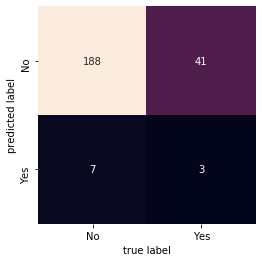

In [21]:
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo']            
X=df19nondup[features]
y=df19nondup['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)

clf= RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

Accuracy Score: 0.8200836820083682
Recall Score: 0.022727272727272728
Precision Score: 1.0


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(2.0, 0.0)

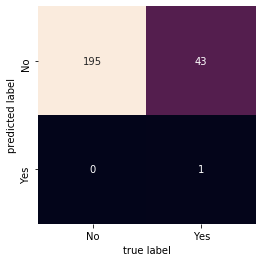

In [23]:
clf = svm.SVC()
clf.fit(X_train, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

### Oversampling
oversampling the top data to have a first idea of how it impacts confusion matrix
#### SVM
oversampling done after test split

df1count  164
df0count  730
df1_over  730


C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


Accuracy Score: 0.6208053691275168
Recall Score: 0.2727272727272727
Precision Score: 0.17045454545454544


(2.0, 0.0)

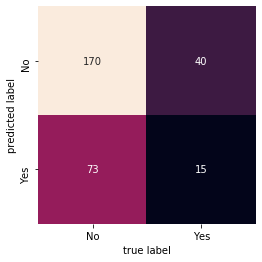

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df19nondup, df19nondup["top"], stratify=df19nondup["top"])
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo']            

# Divide by class
df0 = X_train[X_train['top'] == 0]
df1 = X_train[X_train['top'] == 1]
df1count=df1.shape[0]
df0count=df0.shape[0]
print('df1count ',df1count)
print('df0count ',df0count)
df1_over = df1.sample(df0count, replace=True)
print('df1_over ', df1_over.shape[0])
X_trainb=pd.concat([df1_over, df0], ignore_index=True) #new training Xb balanced
y_train=X_trainb['top']
X_trainb=X_trainb[features]
X_test=X_test[features]
#retry svc
clf = svm.SVC()
clf.fit(X_trainb, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

####  Using SVM
the oversampling done before the test split

C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score: 0.8153846153846154
Recall Score: 0.7948717948717948
Precision Score: 0.8288770053475936


(2.0, 0.0)

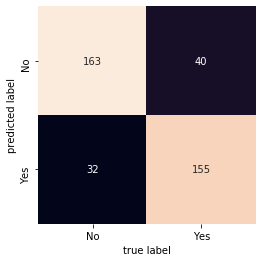

In [32]:
#creating new artificial balanced dataset
df19balanced=pd.concat([df1_over, df0], ignore_index=True)
#resample data
features=['danceability','energy','key','loudness','mode' ,'speechiness','acousticness','instrumentalness','liveness','valence','tempo']            
X=df19balanced[features]
y=df19balanced['top']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2)
#retry svc
clf = svm.SVC()
clf.fit(X_train, y_train)  

y_pred=clf.predict(X_test)

print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred,labels=[1,0]))
print("Precision Score:",precision_score(y_test,y_pred,labels=[1,0]))

mat = confusion_matrix(y_test, y_pred)
s1=sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')
bottom, top = s1.get_ylim()
s1.set_ylim(bottom + 0.5, top - 0.5)

Looking at features alone seems not to be adequate predict if a given song will reach the top 20 at some point. This sugges